# CCTV 파일 연습

In [1]:
import pandas as pd

In [2]:
import os
os.chdir("/Users/yul/Desktop/Pythondata")

In [3]:
pwd

'/Users/yul/Desktop/Pythondata'

## 데이터 읽기

In [30]:
CCTV_RESULT = pd.read_csv('CCTV_result.csv')

In [31]:
CCTV_IN_SEOUL = pd.read_csv('CCTV_IN_SEOUL.csv')

In [32]:
population_in_Seoul = pd.read_excel('population_in_seoul.xls')

## 데이터 정리하기

### CCTV_IN_SEOUL

In [33]:
CCTV_IN_SEOUL.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [34]:
# CCTV_IN_SEOUL 파일의 이름을 '기관명'칼럼을 '구별'로 바꿔주세요.

CCTV_IN_SEOUL.rename({'기관명' : '구별'}, axis = 1, inplace = True)

# 또는 CCTV_IN_SEOUL.columns[0] = '구별'

### population_in_Seoul

In [35]:
population_in_Seoul.iloc[:5]

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [36]:
# 칼럼 골라내기
# 자치구, 인구 합계, 한국인 전체, 등록외국인 전체, 65세 이상 고령자

pops = population_in_Seoul.iloc[:,[1,3,6,9,13]]

In [37]:
# 1~2행 삭제하기

pops = pops.drop([0,1,2])

# 또는 pops.iloc[3:,:]
# 또는 population_in_Seoul.iloc[ 3:, [1,3,6, 9, 13]]

In [38]:
# index 번호를 0번부터 나오도록 바꾸어 봅시다.

pops.index = range(len(pops))

# 또는 pops.reset_index(drop = True)

In [39]:
pops[:5]

,자치구,인구,인구.3,인구.6,65세이상고령자
0,종로구,162820,153589,9231,25425
1,중구,133240,124312,8928,20764
2,용산구,244203,229456,14747,36231
3,성동구,311244,303380,7864,39997
4,광진구,372164,357211,14953,42214


In [40]:
# 구별, 인구수, 한국인, 외국인, 고령자로 칼럼 이름을 바꿔주세요.

pops.columns=['구별','인구수','한국인','외국인','고령자']

In [41]:
pops

,구별,인구수,한국인,외국인,고령자
0,종로구,162820,153589,9231,25425
1,중구,133240,124312,8928,20764
2,용산구,244203,229456,14747,36231
3,성동구,311244,303380,7864,39997
4,광진구,372164,357211,14953,42214
5,동대문구,369496,354079,15417,54173
6,중랑구,414503,409882,4621,56774
7,성북구,461260,449773,11487,64692
8,강북구,330192,326686,3506,54813
9,도봉구,348646,346629,2017,51312


## 원하는 자료 추출

In [42]:
# 인구수가 3번째 많은 구는?

pops.sort_values(by='인구수', ascending = False)

# 강남구

,구별,인구수,한국인,외국인,고령자
23,송파구,667483,660584,6899,72506
15,강서구,603772,597248,6524,72548
22,강남구,570500,565550,4950,63167
10,노원구,569384,565565,3819,71941
20,관악구,525515,507203,18312,68082
11,은평구,494388,489943,4445,72334
14,양천구,479978,475949,4029,52975
7,성북구,461260,449773,11487,64692
24,강동구,453233,449019,4214,54622
21,서초구,450310,445994,4316,51733


#### ※ NaN 값 지우기

In [44]:
# 마지막 행의 NaN 을 지워주세요.

pops = pops.dropna()

# 또는 pops.drop([25]), pops.iloc[:-1,:]

In [45]:
# 구별 인구수 대비 '외국인비율', '고령자비율' 2가지를 새로운 칼럼으로 만들어 주세요.

pops['외국인비율'] = pops['외국인']/pops['인구수']*100
pops['고령자비율'] = pops['고령자']/pops['인구수']*100
pops

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820,153589,9231,25425,5.669451,15.615404
1,중구,133240,124312,8928,20764,6.70069,15.583909
2,용산구,244203,229456,14747,36231,6.038828,14.836427
3,성동구,311244,303380,7864,39997,2.526635,12.850689
4,광진구,372164,357211,14953,42214,4.017852,11.342849
5,동대문구,369496,354079,15417,54173,4.17244,14.661322
6,중랑구,414503,409882,4621,56774,1.114829,13.696885
7,성북구,461260,449773,11487,64692,2.490353,14.025062
8,강북구,330192,326686,3506,54813,1.061806,16.600342
9,도봉구,348646,346629,2017,51312,0.578524,14.717507


## 그래프 그리기

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

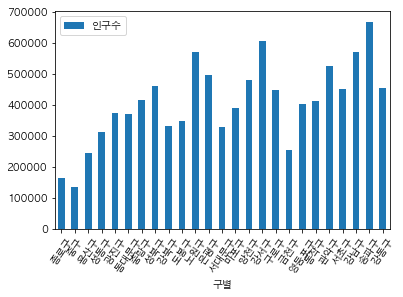

In [46]:
# 구별 인구수를 막대그래프로 나타내주세요.

import matplotlib.pyplot as plt

pops.plot(kind = 'bar', x='구별',y='인구수')
plt.xticks(rotation=55) # 글씨 기울임

<AxesSubplot:xlabel='구별'>

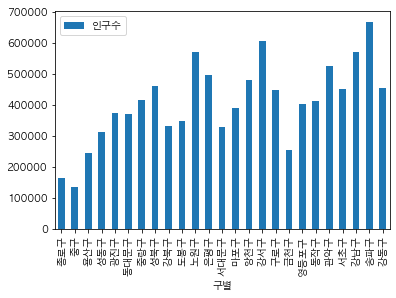

In [47]:
pops.plot.bar(x='구별',y='인구수')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

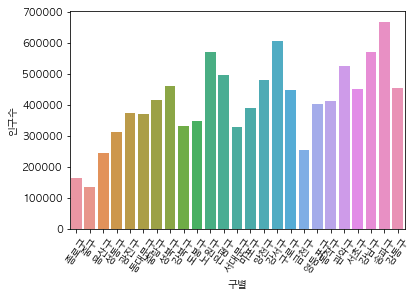

In [48]:
import seaborn as sns

sns.barplot(data=pops, x='구별', y='인구수')
plt.xticks(rotation=55)

## 상관계수 구하기

In [52]:
pops.info()

# pandas에서 dtype object는 문자형!
# 상관계수는 숫자형만 구할 수 있으니까 int로 바꿔줘야함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     object
 2   한국인     25 non-null     object
 3   외국인     25 non-null     object
 4   고령자     25 non-null     object
 5   외국인비율   25 non-null     object
 6   고령자비율   25 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [53]:
# 한국인과 고령자의 상관계수는?

pops[['한국인','고령자']].astype(int).corr()

,한국인,고령자
한국인,1.000000,0.931636
고령자,0.931636,1.000000


In [55]:
pops.columns
pops[['인구수','한국인','외국인','고령자','외국인비율','고령자비율']]

,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,162820,153589,9231,25425,5.669451,15.615404
1,133240,124312,8928,20764,6.70069,15.583909
2,244203,229456,14747,36231,6.038828,14.836427
3,311244,303380,7864,39997,2.526635,12.850689
4,372164,357211,14953,42214,4.017852,11.342849
5,369496,354079,15417,54173,4.17244,14.661322
6,414503,409882,4621,56774,1.114829,13.696885
7,461260,449773,11487,64692,2.490353,14.025062
8,330192,326686,3506,54813,1.061806,16.600342
9,348646,346629,2017,51312,0.578524,14.717507


In [56]:
# 모든 칼럼(구별제외)의 데이터타입을 float형으로 바꾸었다가 int형으로 바꾸어 주세요.

pops['인구수'] = pops['인구수'].astype(float)
pops['인구수'] = pops['인구수'].astype(int)

In [57]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int64 
 2   한국인     25 non-null     object
 3   외국인     25 non-null     object
 4   고령자     25 non-null     object
 5   외국인비율   25 non-null     object
 6   고령자비율   25 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.1+ KB


In [58]:
# 람다함수를 써서 모든 열에 공통적으로 람다함수를 적용시켜 바꿉시다. float형으로 변환

f = lambda x : x.astype(float)
f = lambda x : x.astype(int)

In [59]:
pops.iloc[:,1:] = pops.iloc[:,1:].apply(f)

In [60]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int64 
 2   한국인     25 non-null     int64 
 3   외국인     25 non-null     int64 
 4   고령자     25 non-null     int64 
 5   외국인비율   25 non-null     int64 
 6   고령자비율   25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB


In [61]:
# 예시 ) 열별로 최댓값과 최솟값의 차이를 구하는 람다함수

f = lambda x : x.max() - x.min()

In [62]:
pops[["한국인","고령자"]].apply(f)

한국인    536272
고령자     51784
dtype: int64

In [63]:
pops[["한국인","고령자"]].apply(f, axis = 0)

한국인    536272
고령자     51784
dtype: int64

In [64]:
pops[["한국인","고령자"]].agg(f)

한국인    536272
고령자     51784
dtype: int64

## CCTV_IN_SEOUL

In [65]:
CCTV_RESULT[:3]

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026


In [66]:
CCTV_IN_SEOUL[:3]

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [67]:
# CCTV 개수가 3번쪠 많은 구는?

CCTV_IN_SEOUL.sort_values(by='소계', ascending = False)

# 서초구

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


In [68]:
CCTV_IN_SEOUL.sort_values(by='소계', ascending = False)['구별'].reset_index(drop=True)[2]

'서초구'

In [69]:
# 2014년 + 2015년 대비 2016년의 설치대수 증가율인 '최근 증가율' 칼럼을 만들어 주세요.

CCTV_IN_SEOUL['최근 증가율'] = (CCTV_IN_SEOUL['2016년'] / (CCTV_IN_SEOUL['2014년'] + CCTV_IN_SEOUL['2015년']) -1)*100

In [70]:
CCTV_IN_SEOUL[:3]

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,2780,1292,430,584,932,-8.086785
1,강동구,773,379,99,155,377,48.425197
2,강북구,748,369,120,138,204,-20.930233


In [71]:
pops[:3]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820,153589,9231,25425,5,15
1,중구,133240,124312,8928,20764,6,15
2,용산구,244203,229456,14747,36231,6,14


### CCTV_IN_SEOUL과 pops

In [72]:
# 두 데이터프레임을 합쳐 data라는 이름으로 만들어 주세요.

data = pd.merge(CCTV_IN_SEOUL, pops, how = 'inner', on = '구별')

In [73]:
# 구별을 index로 넣어 주세요.

data = data.set_index('구별')

In [74]:
data[:6]

,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,2780,1292,430,584,932,-8.086785,570500,565550,4950,63167,0,11
강동구,773,379,99,155,377,48.425197,453233,449019,4214,54622,0,12
강북구,748,369,120,138,204,-20.930233,330192,326686,3506,54813,1,16
강서구,884,388,258,184,81,-81.674208,603772,597248,6524,72548,1,12
관악구,1496,846,260,390,613,-5.692308,525515,507203,18312,68082,3,12
광진구,707,573,78,53,174,32.824427,372164,357211,14953,42214,4,11


<AxesSubplot:xlabel='구별'>

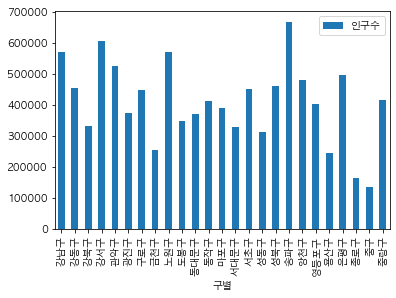

In [75]:
# 구별 인수를 막대그래프를 그려 봅시다.

data.plot(kind='bar', y='인구수')

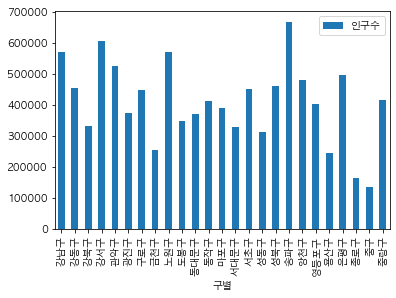

In [76]:
data.plot.bar(y = '인구수')
plt.show()

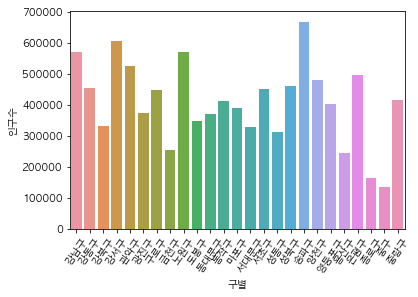

In [77]:
sns.barplot(x= data.index, y='인구수', data=data)
plt.xticks(rotation=55)
plt.show()

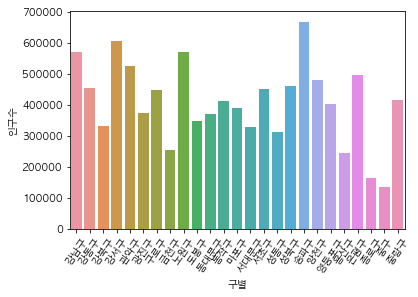

In [78]:
sns.barplot(x= data.index, y='인구수', data=data.reset_index())
plt.xticks(rotation=55)
plt.show()

In [79]:
# cctv대수 / 인구수 대비가 가장 높은 순서대로 정렬해 주세요. 소계, 인구수, cctv대수 / 인구수 세개의 칼럼만 df로 저장

data['cctv대수/인구수'] = data['소계'] / data['인구수']

df = data[['소계','인구수', 'cctv대수/인구수']]
df.sort_values(by='cctv대수/인구수', ascending = False)

,소계,인구수,cctv대수/인구수
구별,,,
용산구,1624,244203,0.006650
종로구,1002,162820,0.006154
중구,671,133240,0.005036
강남구,2780,570500,0.004873
서초구,1930,450310,0.004286
양천구,2034,479978,0.004238
금천구,1015,255082,0.003979
은평구,1873,494388,0.003789
동대문구,1294,369496,0.003502


<AxesSubplot:xlabel='인구수', ylabel='소계'>

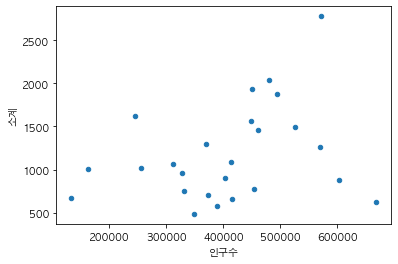

In [80]:
# df에 대하여 인구수와 소계의 산점도를 그려봅시다.

df.plot(kind='scatter',x='인구수', y='소계')

<AxesSubplot:ylabel='구별'>

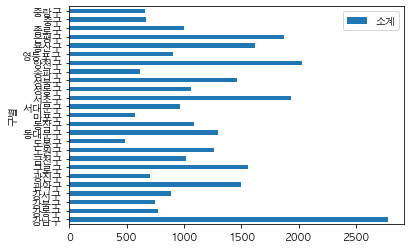

In [81]:
# df에 대하여 구별 소계의 수평막대그래프를 그려봅시다.

df.plot(kind='barh', y='소계')

# 함수

## 로지스틱 함수

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [84]:
x = np.linspace(-10,10,100)

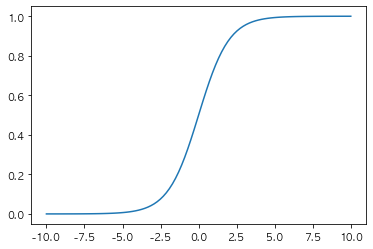

In [85]:
plt.plot(x, logistic(x))

## 지수함수

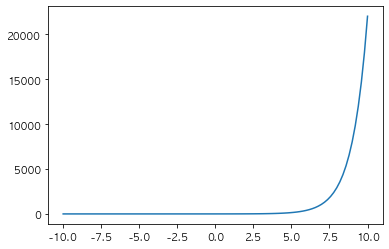

In [86]:
plt.plot(x, np.exp(x))

### 복습

In [87]:
# 5x8 행렬 (성분은 10이하의 정수)
a = np.array(np.random.randint(10,size=40).reshape(5,8))

In [88]:
# 8x7 행렬 (성분은 10이하의 정수)
b = np.array(np.random.randint(10,size=56).reshape(8,7))

#### 행렬 내적

In [89]:
# 행렬의 곱셈 (내적)
a @ b

array([[114, 162, 174, 114, 248, 110, 108],
       [176, 112, 172, 115, 190, 104,  39],
       [ 87, 151, 128,  64, 160,  82,  82],
       [135, 112, 146,  77,  98, 104,  38],
       [ 75, 103, 127,  45, 139,  63,  45]])

In [90]:
a.dot(b)

array([[114, 162, 174, 114, 248, 110, 108],
       [176, 112, 172, 115, 190, 104,  39],
       [ 87, 151, 128,  64, 160,  82,  82],
       [135, 112, 146,  77,  98, 104,  38],
       [ 75, 103, 127,  45, 139,  63,  45]])

In [91]:
np.matmul(a,b)

array([[114, 162, 174, 114, 248, 110, 108],
       [176, 112, 172, 115, 190, 104,  39],
       [ 87, 151, 128,  64, 160,  82,  82],
       [135, 112, 146,  77,  98, 104,  38],
       [ 75, 103, 127,  45, 139,  63,  45]])

In [92]:
np.dot(a,b)

array([[114, 162, 174, 114, 248, 110, 108],
       [176, 112, 172, 115, 190, 104,  39],
       [ 87, 151, 128,  64, 160,  82,  82],
       [135, 112, 146,  77,  98, 104,  38],
       [ 75, 103, 127,  45, 139,  63,  45]])

In [93]:
def sigmod(x) :
    return 1/(1 + np.exp(-x))

In [94]:
sigmod(a@b)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

## 부호함수

In [95]:
np.sign(3.25)

1.0

In [96]:
np.sign(0)

0

In [97]:
np.sign(-1.23)

-1.0

In [98]:
# [-1, 3] 10개의 점으로 나누어라.

x = np.linspace(-1,3,20)

In [99]:
import matplotlib.pyplot as plt

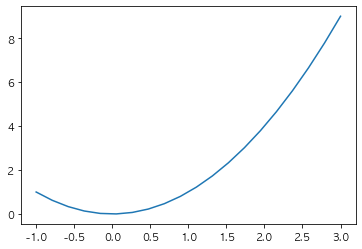

In [100]:
plt.plot(x, x**2)

## 다항삼수 그리기

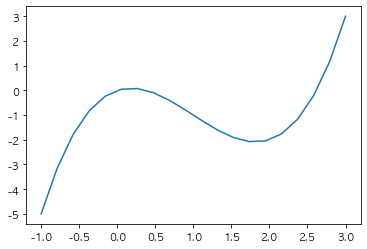

In [101]:
plt.plot(x, x**3 - 3*x**2 + x)

In [102]:
def f(x) :
    return x**2

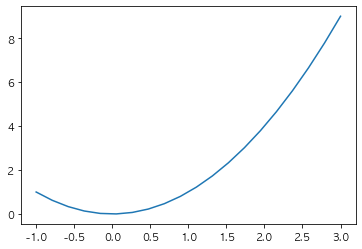

In [103]:
plt.plot(x, f(x))

In [104]:
x = np.linspace(0,3,20)

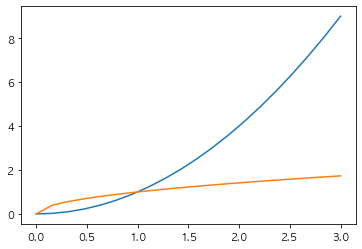

In [105]:
plt.plot(x, f(x))
plt.plot(x, np.sqrt(x)) # 역함수

## ReLU 함수, 중요!

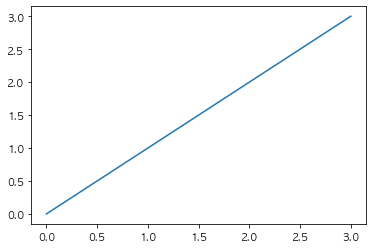

In [106]:
plt.plot(x, np.maximum(x,0))

In [107]:
def relu(x) :
    if x>=0:
        return x
    else :
        return 0

In [108]:
x = np.linspace(-3, 3,20)
plt.plot(x, relu(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## 지수함수

In [109]:
np.e

2.718281828459045

In [110]:
np.exp(3)

20.085536923187668

In [111]:
np.exp(0)

1.0

In [112]:
np.exp(0.1)

1.1051709180756477

In [113]:
np.exp(-0.1)

0.9048374180359595

In [114]:
np.exp(-1)

0.36787944117144233

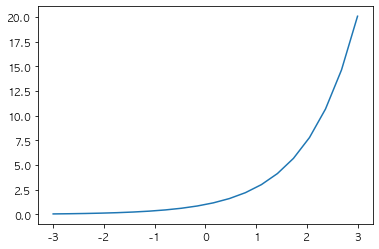

In [115]:
plt.plot(x, np.exp(x))

## 로그함수

In [116]:
np.log(x)

/var/folders/6z/_hbzx8ln77jg3b982qzcp4xh0000gn/T/ipykernel_2288/1277889159.py:1: RuntimeWarning: invalid value encountered in log
  np.log(x)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -1.84582669, -0.7472144 , -0.23638878,  0.10008346,  0.35139789,
        0.55206858,  0.71912267,  0.86222351,  0.98738665,  1.09861229])

/var/folders/6z/_hbzx8ln77jg3b982qzcp4xh0000gn/T/ipykernel_2288/2742365056.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x))


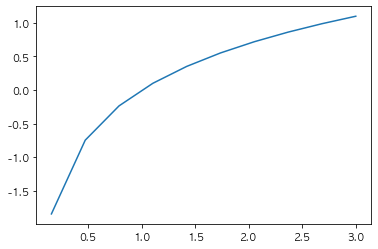

In [117]:
plt.plot(x, np.log(x))

### ※ 그래프 한글깨짐 해결방법

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## 다변수함수

/var/folders/6z/_hbzx8ln77jg3b982qzcp4xh0000gn/T/ipykernel_2288/3551058971.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


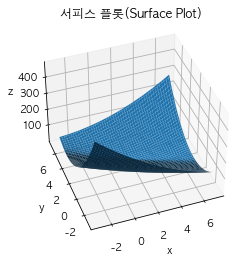

In [118]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0.1)
ax.view_init(40, -110)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title("서피스 플롯(Surface Plot)")
plt.show()

# 심파이(SymPy)를 사용한 함수 미분

In [119]:
def f(x) :
    return x**3 - 3*x**2 + x

In [120]:
x = np.linspace(-1, 3, 400)

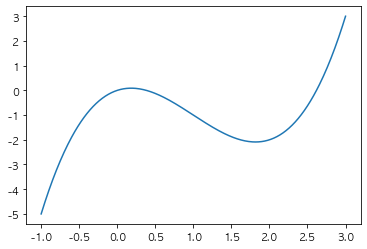

In [121]:
# 그래프를 그려봅시다.

plt.plot(x, f(x))
plt.show()

In [122]:
from scipy.misc import derivative

In [123]:
derivative(f, 0, dx = 1e-6)

1.000000000001

In [124]:
# x=1인 지점에서의 기울기는?
derivative(f, 1, dx = 1e-6)

-2.000000000002

In [125]:
def f(x) :
    return x**3 - 3*x**2 + x

## 도함수 구하기

In [126]:
import sympy

In [127]:
x = sympy.symbols('x')
f = x**3 - 3*x**2 + 1

In [128]:
sympy.diff(f)

3*x**2 - 6*x

In [129]:
sympy.simplify(sympy.diff(f))

3*x*(x - 2)

In [130]:
f = x * sympy.exp(x)
sympy.diff(f)

x*exp(x) + exp(x)

In [131]:
sympy.simplify(sympy.diff(f))

(x + 1)*exp(x)

In [132]:
# 시그모이드를 미분한 도함수는?

f = 1 / (1+sympy.exp(-x))
sympy.diff(f)

exp(-x)/(1 + exp(-x))**2

In [133]:
x, y = sympy.symbols('x y')
f = x**2 + 4*x*y + 4*y**2
f

x**2 + 4*x*y + 4*y**2

In [134]:
sympy.diff(f,x)

2*x + 4*y

In [135]:
sympy.diff(f,y)

4*x + 8*y

Derivative : 도함수

derivative - 도함수를 구해 특정 x값을 넣어 그 지점의 기울기 구하기

diff - 도함수 구하기